<a href="https://colab.research.google.com/github/Umang32/films_LinearRegression/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data.replace(regex=True, inplace=True, to_replace=r'[$,]', value=r'')

In [ ]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,20000 Leagues Under the Sea,200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data.Release_Date = pd.to_datetime(data["Release_Date"])

In [ ]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget            object
USD_Worldwide_Gross              object
USD_Domestic_Gross               object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   object        
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.head()
data.shape

(5391, 6)

In [ ]:
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """


Rank                         2,696.00
USD_Production_Budget   31,113,737.58
USD_Worldwide_Gross     88,855,421.96
USD_Domestic_Gross      41,235,519.44
dtype: float64

In [ ]:
data.min()

Rank                                       1
Release_Date             1915-08-02 00:00:00
Movie_Title                          #Horror
USD_Production_Budget                   1100
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
dtype: object

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
data.sort_values(by= "USD_Domestic_Gross").head(1350)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5390,2517,2020-12-31,Story of Bonnie and Clyde The,20000000,0,0
4547,3778,2014-01-28,Snezhnaya koroleva,7000000,15206330,0
3312,4933,2008-12-31,Steppin: The Movie,1000000,0,0
3311,4813,2008-12-31,Extreme Movie,1200000,81338,0
4568,3229,2014-03-10,Drive Hard,12000000,0,0
...,...,...,...,...,...,...
865,1625,1996-04-19,Le hussard sur le toit,35000000,1320043,1320043
3932,5262,2011-07-22,Another Earth,175000,2102779,1321194
2503,4206,2005-09-16,Thumbsucker,4000000,1919197,1328679
5205,3691,2016-06-24,The Neon Demon,7500000,3559803,1333124


In [ ]:
data.max()

Rank                                    5391
Release_Date             2020-12-31 00:00:00
Movie_Title                       長江七號 (CJ7)
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 936662225
dtype: object

In [ ]:
data.sort_values(by= "USD_Production_Budget",ascending = False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115


In [ ]:
data.sort_values(by= "USD_Worldwide_Gross",ascending = False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547


In [ ]:
data.sort_values(by= "USD_Production_Budget").head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
1209,5387,1999-02-04,Following,6000,240495,48482


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data["USD_Domestic_Gross"]==0].sort_values(by="USD_Production_Budget", ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,Don Gato el inicio de la pandilla,80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data[data["USD_Worldwide_Gross"]==0].sort_values(by="USD_Production_Budget", ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data.query("USD_Worldwide_Gross != 0 & USD_Domestic_Gross == 0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
data[data["Release_Date"] > scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,Story of Bonnie and Clyde The,20000000,0,0


In [ ]:
data[data["Release_Date"] >= scrape_date].count()

Rank                     7
Release_Date             7
Movie_Title              7
USD_Production_Budget    7
USD_Worldwide_Gross      7
USD_Domestic_Gross       7
dtype: int64

In [ ]:
data_clean = data[data["Release_Date"] < scrape_date]

In [ ]:
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [ ]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

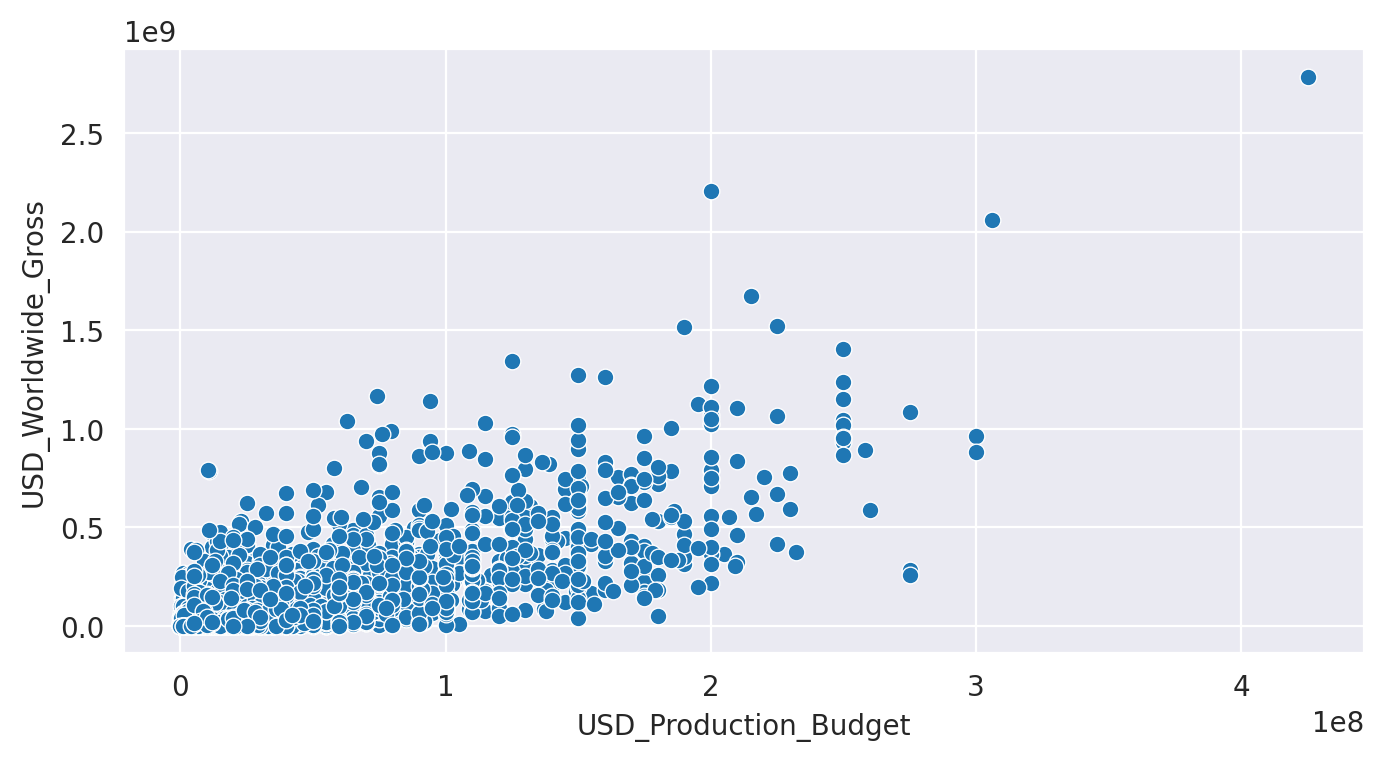

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data = data_clean, x= "USD_Production_Budget", y= "USD_Worldwide_Gross")
plt.show()


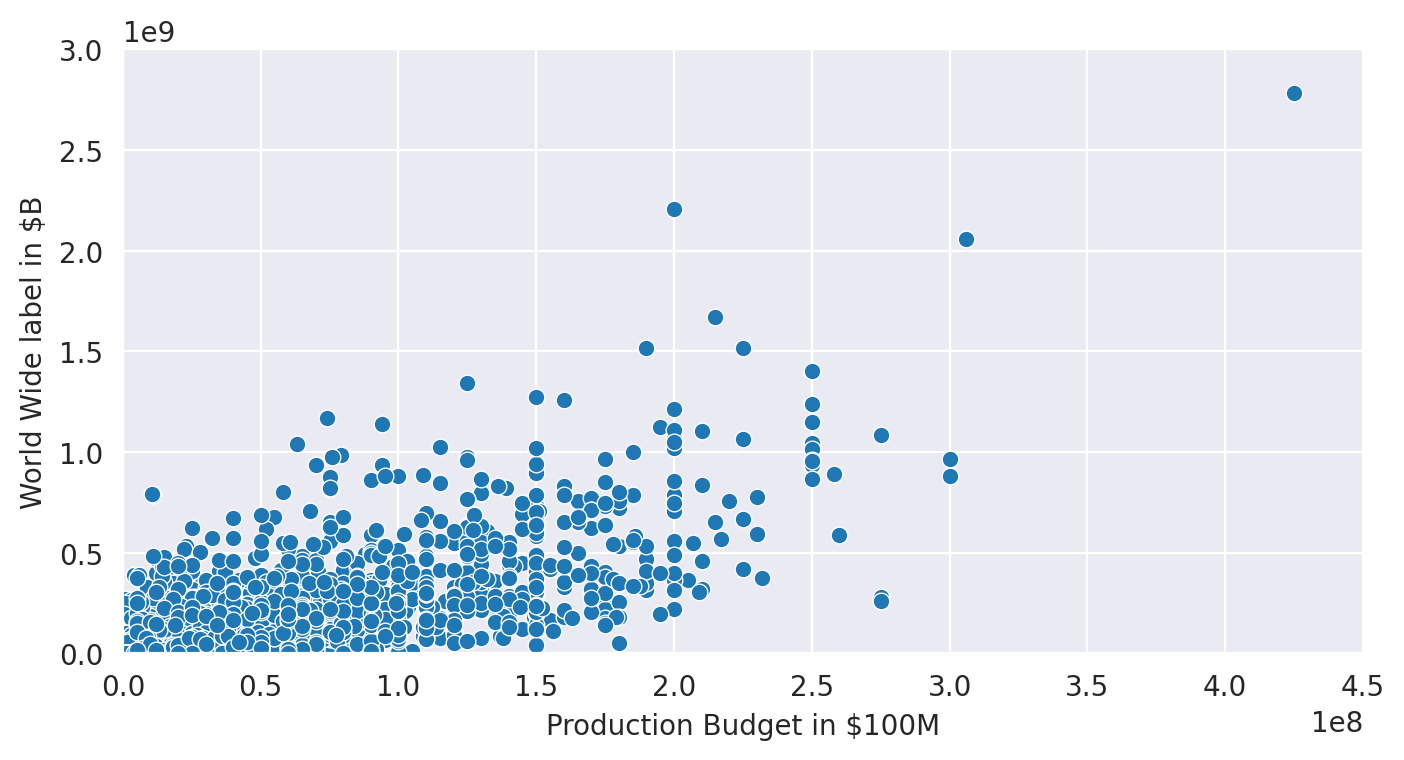

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data = data_clean, x= "USD_Production_Budget", y= "USD_Worldwide_Gross")
ax.set (xlim = (0, 450000000), ylim = (0, 3000000000), xlabel= "Production Budget in $100M", ylabel = "World Wide label in $B")
plt.show()

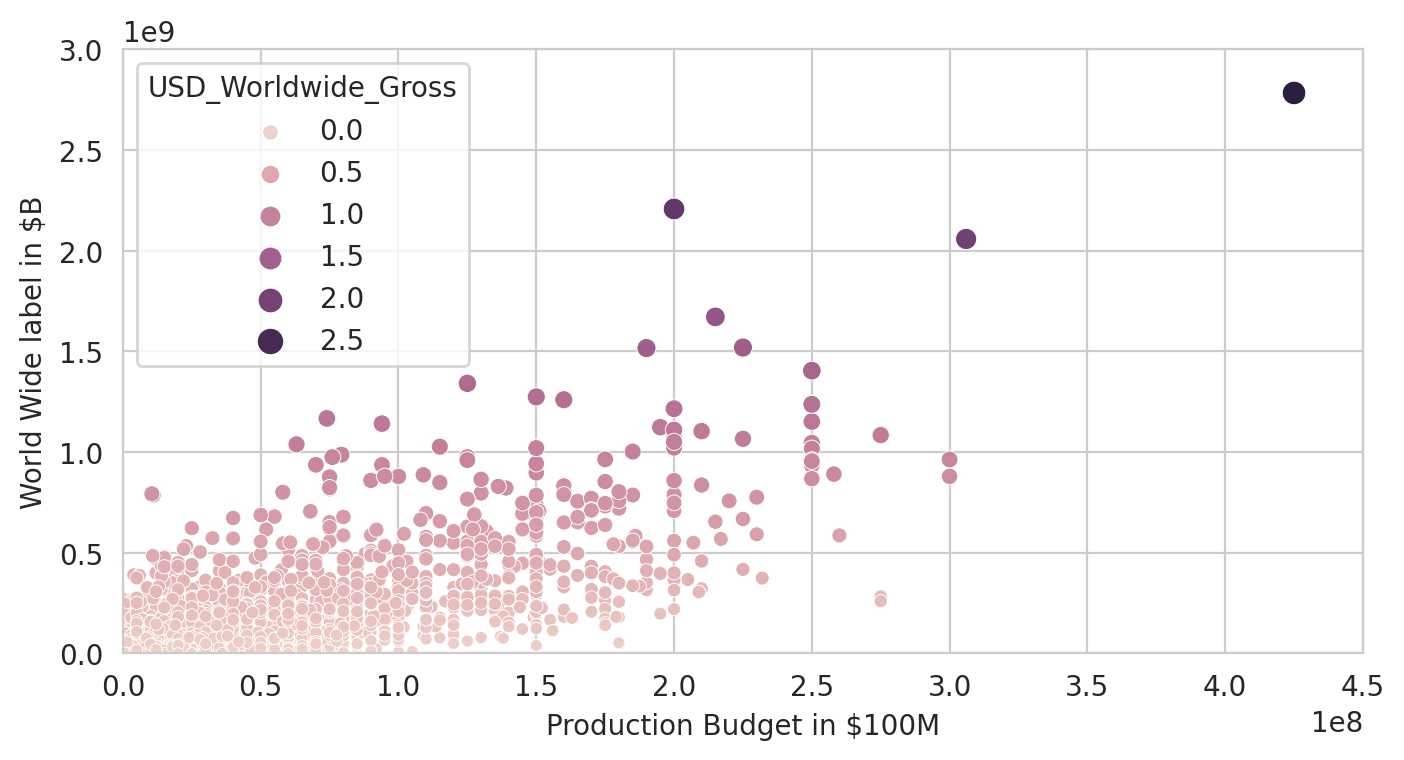

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):

  ax = sns.scatterplot(data = data_clean, x= "USD_Production_Budget", y= "USD_Worldwide_Gross", hue= "USD_Worldwide_Gross", size="USD_Worldwide_Gross")
  ax.set (xlim = (0, 450000000), ylim = (0, 3000000000), xlabel= "Production Budget in $100M", ylabel = "World Wide label in $B")
  plt.show()

In [ ]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,20000 Leagues Under the Sea,200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



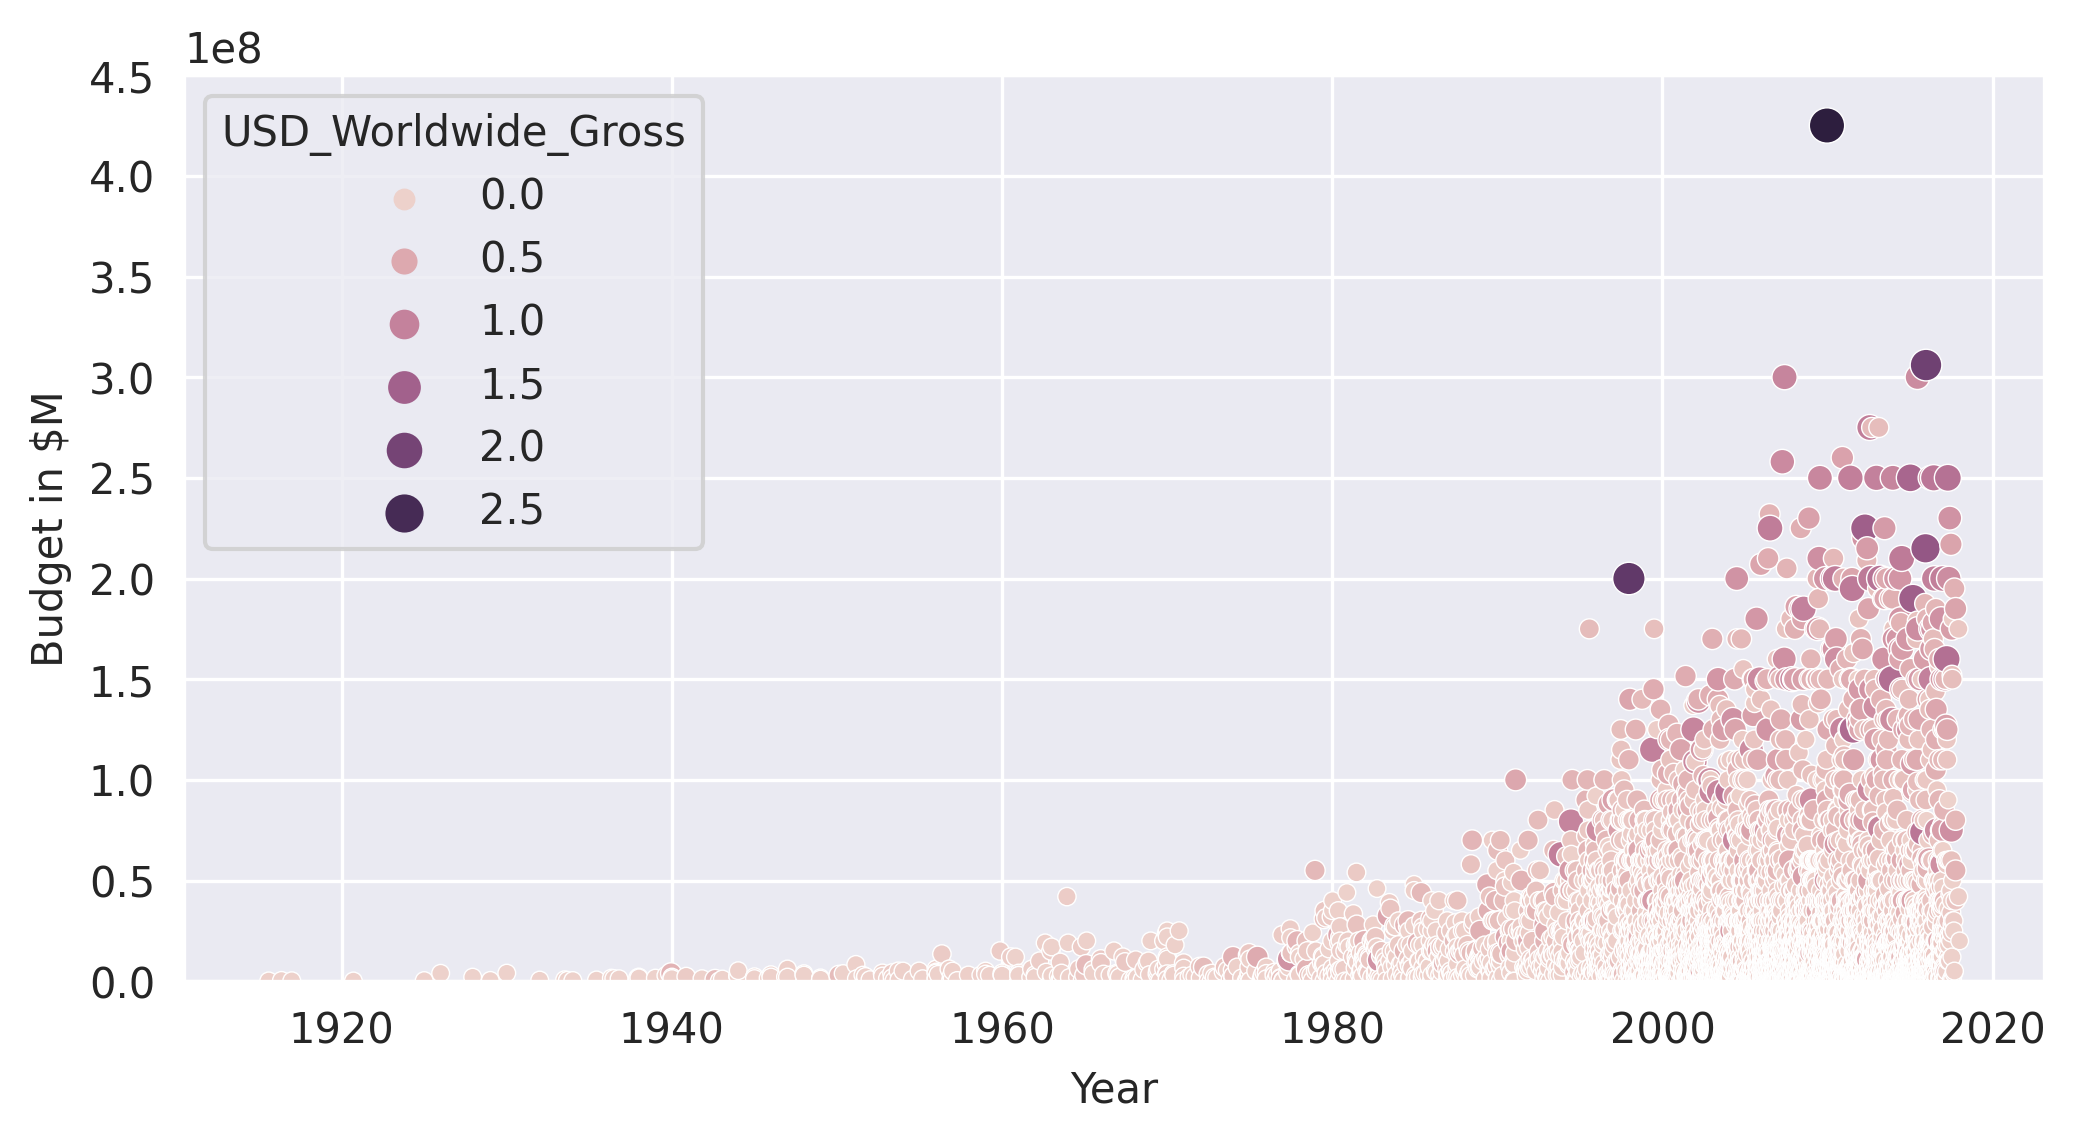

In [ ]:
plt.figure(figsize=(8,4), dpi=300)

with sns.axes_style('darkgrid'):
  
  ax = sns.scatterplot(data= data_clean, x= "Release_Date", y= "USD_Production_Budget", hue="USD_Worldwide_Gross", size="USD_Worldwide_Gross")
  ax.set(xlabel= "Year", ylabel= "Budget in $M",ylim = (0, 450000000))

  plt.show()


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
new = pd.DatetimeIndex(data= data_clean["Release_Date"]).year
new = new//10
new = new * 10

data_clean["Decade"] = new
data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,20000 Leagues Under the Sea,200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_film = data_clean[data_clean["Decade"] < 1970]
old_film.head()
new_film = data_clean[data_clean["Decade"] >= 1970]
new_film.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


In [ ]:
old_film.shape

(153, 7)

In [ ]:
old_film.sort_values("USD_Production_Budget" , ascending= False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,Hello Dolly,24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

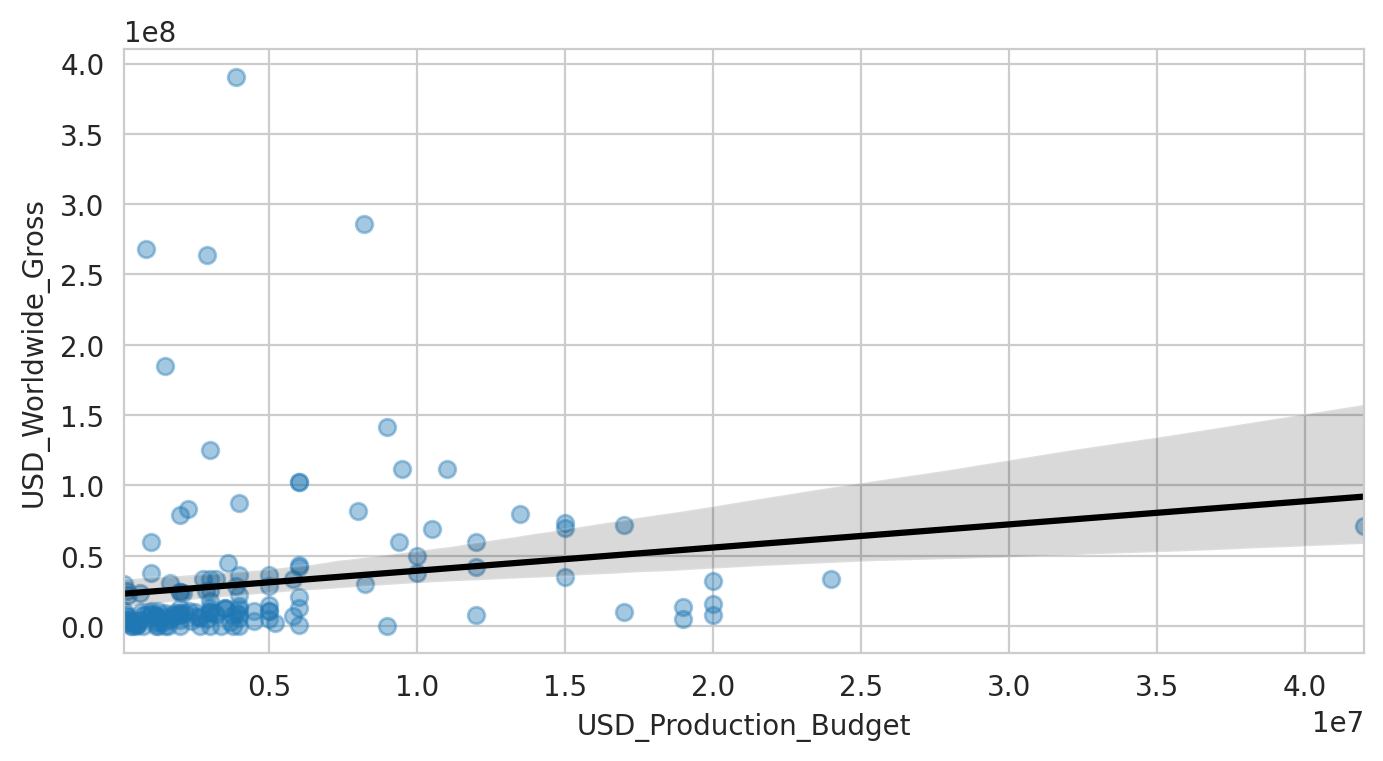

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_film, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

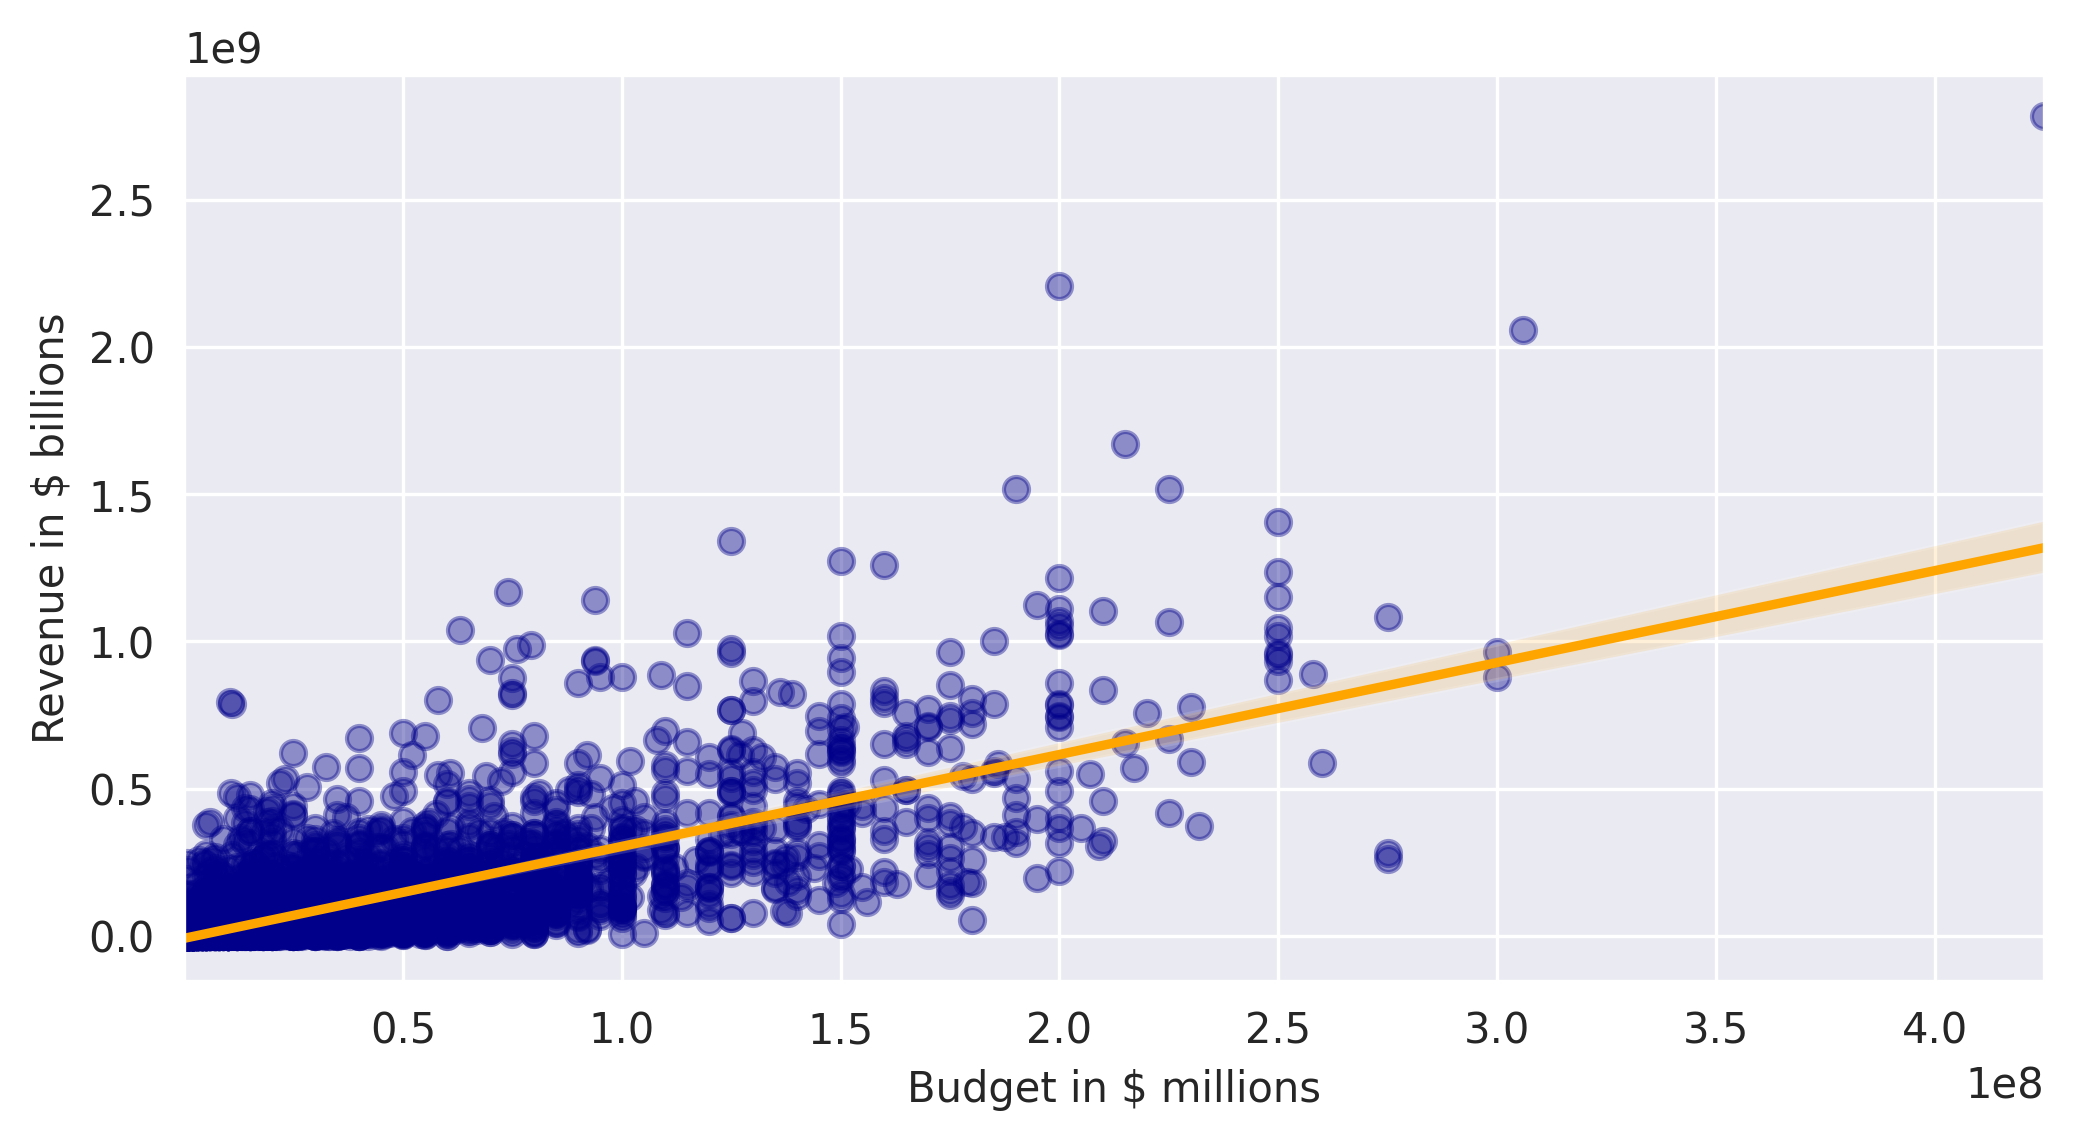

In [ ]:
plt.figure(figsize=(8,4), dpi = 300)

with sns.axes_style("darkgrid"):

  ax = sns.regplot(data= new_film , x = "USD_Production_Budget", y = "USD_Worldwide_Gross", scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'orange'}, color = "darkblue")
  ax.set(xlabel= "Budget in $ millions", ylabel= "Revenue in $ billions")

  plt.show()






# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [137]:
old_film.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,20000 Leagues Under the Sea,200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [152]:
X = pd.DataFrame(data = old_film, columns= ["USD_Production_Budget"])
y = pd.DataFrame(data= old_film, columns=["USD_Worldwide_Gross"])

reg = LinearRegression().fit(X, y)

In [153]:
reg.score(X,y)

0.02937258620576877

In [154]:
reg.coef_

array([[1.64771314]])

In [155]:
reg.intercept_

array([22821538.63508039])

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [158]:
budget = 350000000
revenue_estimate = reg.intercept_[0] + reg.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350000000 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350000000 film is around $600000000.0.


Today was a pretty packed lesson where we introduced a lot of new concepts. In this lesson we looked at how to:

Use nested loops to remove unwanted characters from multiple columns

Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

Create bubble charts using the Seaborn Library

Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

Use floor division (i.e., integer division) to convert years to decades

Use Seaborn to superimpose a linear regressions over our data

Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

Run regressions with scikit-learn and calculate the coefficients.